In [1]:
# Import relevant packages

import uproot # conda install -c conda-forge uproot
import vector # conda install -c conda-forge vector
import awkward as ak
import numpy as np
import matplotlib.pyplot as plt
import math
import numpy as np
import pandas as pd
from scipy import optimize
from matplotlib import pyplot as plt
plt.style.use('seaborn-v0_8-colorblind')

In [2]:
plt.style.use('seaborn-v0_8-colorblind')
plt.rcParams.update({'font.size': 20})
plt.rcParams.update({'xtick.major.size' : 10}) 
plt.rcParams.update({'ytick.major.size' : 10}) 
plt.rcParams.update({'xtick.minor.size' : 5}) 
plt.rcParams.update({'ytick.minor.size' : 5}) 
plt.rcParams.update({'axes.labelsize' : "large"}) 

In [3]:
f=uproot.open("/Users/isaac/Desktop/mucolstudies/ntup_tracksAllNoBIB.root")

In [4]:
print(type(f["tracks_tree"]["x"].array()))

<class 'awkward.highlevel.Array'>


In [5]:
treeNoBIB=uproot.open("/Users/isaac/Desktop/mucolstudies/ntup_tracksAllNoBIB.root")["tracks_tree"]

In [6]:
treeBIB=uproot.open("/Users/isaac/Desktop/mucolstudies/ntup_tracks100BIB.root")["tracks_tree"]

In [7]:
# a handy plotting function
def plot1DHistogram(data,bins,scale='linear',label="", savefig=False, dpi=300):
    
    # handle data, there must be a smarter way to do this...
    if type(data[0])==np.int64 : data_flat=data
    elif type(data[0])==np.float32 : data_flat=data
    elif type(data[0])==np.float64 : data_flat=data
    else: data_flat = ak.flatten(data)
    
    fig = plt.figure(figsize=(15,10))
    ax = fig.add_subplot(111)
    
    ax.hist(data_flat, bins=bins)
    
    # handle labels
    title  = "" if len(label.split(";")) < 1 else label.split(";")[0]  
    xlabel = "" if len(label.split(";")) < 2 else label.split(";")[1]  
    ylabel = "" if len(label.split(";")) < 3 else label.split(";")[2] 
    
    ax.set_title(title)
    ax.set_xlabel(xlabel, fontsize=15)
    ax.set_ylabel(ylabel, fontsize=15)
    plt.yscale(scale)
    if savefig:
        plt.savefig(title + ".png", dpi=dpi)
    plt.show()

In [8]:
# a handy plotting function
def plot2DHistogram(datax, datay, bins=100, norm="log", label="", savefig=False, dpi=300):
    
    data_flatx = np.array(np.ravel(datax)).T
    data_flaty = np.array(np.ravel(datay)).T
    #print(len(data_flatx),data_flatx)
    #print(len(data_flaty),data_flaty)
    
    fig = plt.figure(figsize=(15,10))
    ax = fig.add_subplot(111)
    
    hh = ax.hist2d(data_flatx, data_flaty, bins=bins, norm=norm, cmap="plasma")
    
    title  = "" if len(label.split(";")) < 1 else label.split(";")[0]  
    xlabel = "" if len(label.split(";")) < 2 else label.split(";")[1]  
    ylabel = "" if len(label.split(";")) < 3 else label.split(";")[2]  
    zlabel = "" if len(label.split(";")) < 4 else label.split(";")[3] 
    
    ax.set_title(title)
    ax.set_xlabel(xlabel, fontsize=15)
    ax.set_ylabel(ylabel, fontsize=15)
    
    # colorbars are annoying
    cbar = fig.colorbar(hh[3])
    #cbar.ax.tick_params(labelsize=tick_font_size)
    cbar.set_label(zlabel, fontsize=15)

    if savefig:
        plt.savefig(title + ".png", dpi=dpi)
    plt.show()

In [9]:
vector.register_awkward()
BIB={
    "x" : treeBIB["x"].array(library="np"),
    "y" : treeBIB["y"].array(library="np"),
    "z" : treeBIB["z"].array(library="np"),
    "t" : treeBIB["t"].array(library="np")
}

In [10]:
vector.register_awkward()
noBIB={
    "x" : treeNoBIB["x"].array(library="np"),
    "y" : treeNoBIB["y"].array(library="np"),
    "z" : treeNoBIB["z"].array(library="np"),
    "t" : treeNoBIB["t"].array(library="np")
}

In [11]:
BIBSize=len(BIB["t"])
noBIBSize=len(noBIB["t"])

In [12]:
print(BIBSize)
print(noBIBSize)

181267
10808


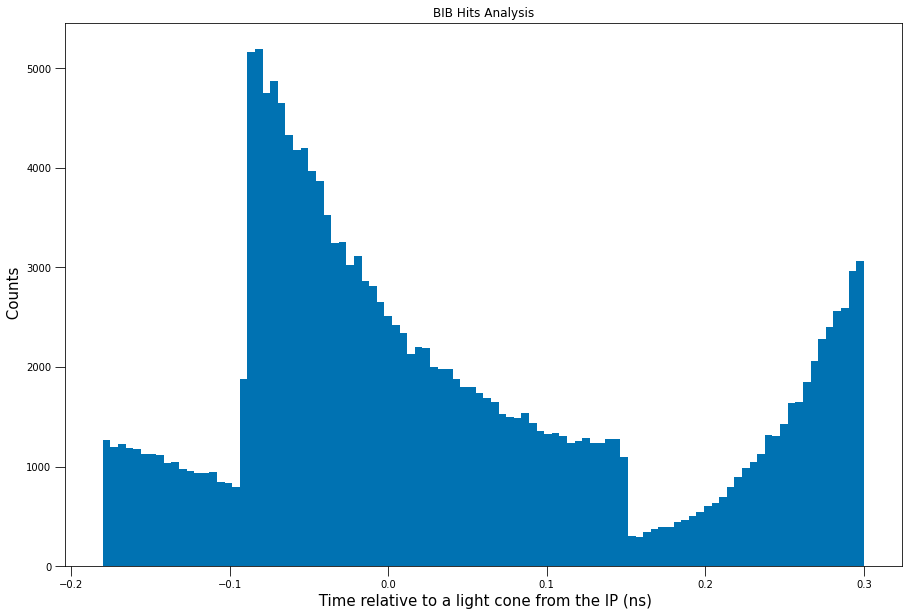

In [13]:
plot1DHistogram(BIB["t"], bins=100, label="BIB Hits Analysis; Time relative to a light cone from the IP (ns); Counts", savefig=True)

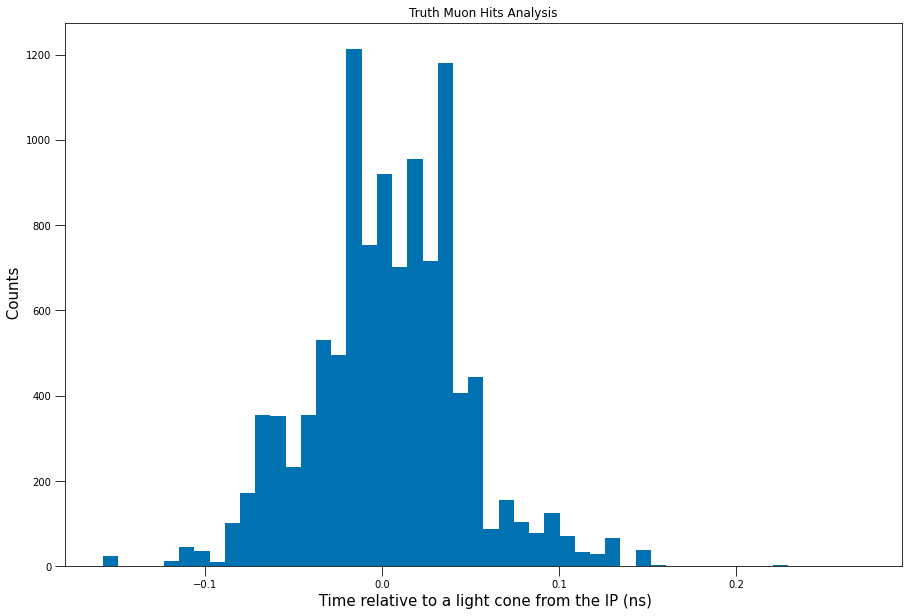

In [14]:
plot1DHistogram(noBIB["t"], bins=50,label="Truth Muon Hits Analysis; Time relative to a light cone from the IP (ns); Counts", savefig=True)

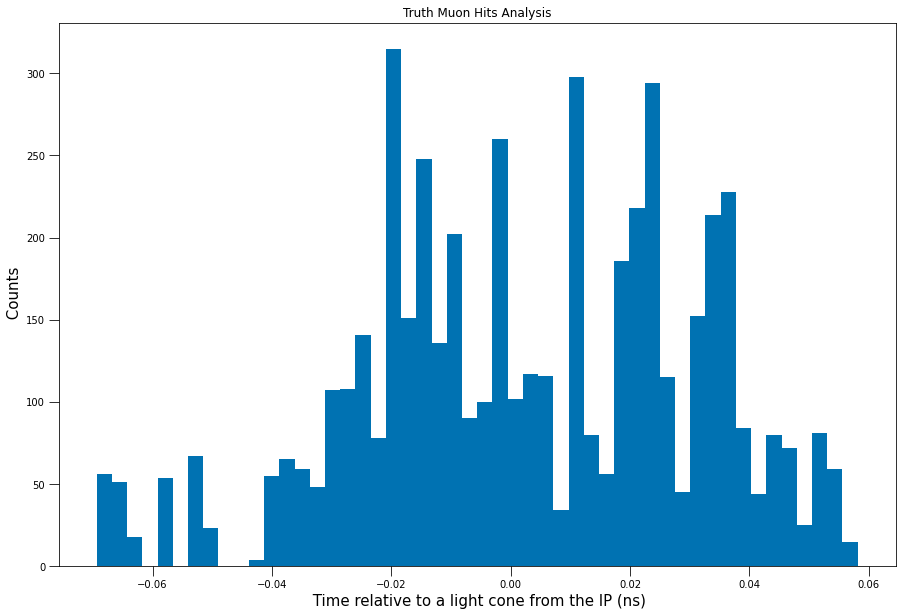

In [16]:
roughVer=np.sqrt(noBIB["x"]**2+noBIB["y"]**2+noBIB["z"]**2) < 125
plot1DHistogram(noBIB["t"][roughVer], bins=50,label="Truth Muon Hits Analysis; Time relative to a light cone from the IP (ns); Counts", savefig=True)

In [ ]:
plot2DHistogram(noBIB["x"],noBIB["y"], bins=200)

In [ ]:
plot2DHistogram(BIB["x"],BIB["y"], bins=200)

In [ ]:
print(len(BIB["t"]))
print(len(BIB["x"]))
print(len(BIB["y"]))
print(len(BIB["z"]))

In [ ]:
print(len(noBIB["t"]))
print(len(noBIB["x"]))
print(len(noBIB["y"]))
print(len(noBIB["z"]))

In [ ]:
plot2DHistogram(np.sqrt(noBIB["x"]**2+noBIB["y"]**2), noBIB["t"])

In [ ]:
plot2DHistogram(np.sqrt(noBIB["x"]**2+noBIB["y"]**2+noBIB["z"]**2), noBIB["t"])

In [ ]:
plot2DHistogram(np.sqrt(BIB["x"]**2+BIB["y"]**2), BIB["t"])

In [ ]:
plot2DHistogram(np.sqrt(BIB["x"]**2+BIB["y"]**2+BIB["z"]**2), BIB["t"])

In [ ]:
def exponentialCuttoff(p,rad):
    return p[1]*(rad-p[0])**p[2] #return is a radius

In [ ]:
def inBounds(p,t,r):
    under=(r>exponentialCuttoff((p[0],p[1],p[2]),t)) & (t>p[0])
    over=(r>exponentialCuttoff((p[3],p[4],p[5]),t))& (t<=p[3])
    print(np.sum((under | over) | ((t<p[0]) & (t>=p[3]))))
    return np.sum((under | over) | ((t<p[0]) & (t>=p[3])))

In [ ]:
def residual(p,func, BIBt,BIBr, noBIBt,noBIBr):
    print(p)
    return func(p,noBIBt,noBIBr)/noBIBSize-func(p,BIBt,BIBr)/BIBSize

In [ ]:
p0=(0.05, 0.01/np.sqrt(2500), 0.5,-0.05, -0.01/np.sqrt(2500),0.5)
#p0=[1,1,1,-1,-1,1]
step=(0.01,0.000005/np.sqrt(2500),0.1,0.01,0.000005/np.sqrt(2500),0.1)
fit = optimize.least_squares(residual, p0, diff_step=step,args=(inBounds,BIB["t"], np.sqrt(BIB["x"]**2+BIB["y"]**2+BIB["z"]**2), noBIB["t"], np.sqrt(noBIB["x"]**2+noBIB["y"]**2+noBIB["z"]**2)), verbose=2)

In [ ]:
print(fit)

In [ ]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)

hh = ax.hist2d(noBIB["t"], np.sqrt(noBIB["x"]**2+noBIB["y"]**2+noBIB["z"]**2), bins=100, norm="log", cmap="plasma")

title  = "Truth muon hits" 
xlabel = "Time relative to a light cone from the IP (ns)"
ylabel = "Distance from origin (mm)"
zlabel = "Counts"

ax.set_title(title)
ax.set_xlabel(xlabel, fontsize=15)
ax.set_ylabel(ylabel, fontsize=15)

# colorbars are annoying
cbar = fig.colorbar(hh[3])
#cbar.ax.tick_params(labelsize=tick_font_size)
cbar.set_label(zlabel, fontsize=15)

plt.plot(np.linspace(0.01,0.3,1000),exponentialCuttoff((0.01,1200/0.1**4,4),np.linspace(0.01,0.3,1000)), color="g",linewidth=6)
plt.plot(np.linspace(-0.03,-0.15,1000),exponentialCuttoff((-0.03,3000/0.1**4,4),np.linspace(-0.03,-0.15,1000)), color="g",linewidth=6)

if True:
    plt.savefig(title + ".png", dpi=300)
plt.show()

In [ ]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)

hh = ax.hist2d(BIB["t"], np.sqrt(BIB["x"]**2+BIB["y"]**2+BIB["z"]**2), bins=100, norm="log", cmap="plasma")

title  = "BIB hits" 
xlabel = "Time relative to a light cone from the IP (ns)"
ylabel = "Distance from origin (mm)"
zlabel = "Counts"

ax.set_title(title)
ax.set_xlabel(xlabel, fontsize=15)
ax.set_ylabel(ylabel, fontsize=15)

# colorbars are annoying
cbar = fig.colorbar(hh[3])
#cbar.ax.tick_params(labelsize=tick_font_size)
cbar.set_label(zlabel, fontsize=15)

plt.plot(np.linspace(0.01,0.3,1000),exponentialCuttoff((0.01,1200/0.1**4,4),np.linspace(0.01,0.3,1000)), color="g",linewidth=6)
plt.plot(np.linspace(-0.03,-0.15,1000),exponentialCuttoff((-0.03,3000/0.1**4,4),np.linspace(-0.03,-0.15,1000)), color="g",linewidth=6)

if True:
    plt.savefig(title + ".png", dpi=300)
plt.show()

In [ ]:
param=(0.01,1200/0.1**4,4,-0.03,3000/0.1**4,4)

In [ ]:
print((1-inBounds(param,BIB["t"],np.sqrt(BIB["x"]**2+BIB["y"]**2+BIB["z"]**2))/BIBSize)*100)

In [ ]:
print((inBounds(param,noBIB["t"],np.sqrt(noBIB["x"]**2+noBIB["y"]**2+noBIB["z"]**2))/noBIBSize)*100)